In [3]:
from PIL import Image
from PIL import ImageEnhance
from numpy import asarray
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split
from skimage import io, color, img_as_ubyte, img_as_float, data, exposure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import glob

In [4]:
# GLCM properties
def contrast_feature(matrix_coocurrence):
    contrast = greycoprops(matrix_coocurrence, 'contrast')
    return contrast

def dissimilarity_feature(matrix_coocurrence):
    dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')	
    return dissimilarity

def homogeneity_feature(matrix_coocurrence):
    homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
    return homogeneity

def energy_feature(matrix_coocurrence):
    energy = greycoprops(matrix_coocurrence, 'energy')
    return energy

def correlation_feature(matrix_coocurrence):
    correlation = greycoprops(matrix_coocurrence, 'correlation')
    return correlation

def asm_feature(matrix_coocurrence):
    asm = greycoprops(matrix_coocurrence, 'ASM')
    return asm

In [5]:
# Array of List
image_list = []
feature_list = []
label_list = []

In [ ]:
# Image Enhancer
image = Image.open("Dataset_B (1).jpg")
color = ImageEnhance.Color(image)

image.show()
color.enhance(2).show()

In [6]:
# Data Feature Extraction
counter = 0
labels = ['a','b','d']
for label in labels:
    i = 0
    for filename in glob.glob("Dataset_"+label+"*.jpg"): 
        i+=1
        im=Image.open(filename)
        color1 = ImageEnhance.Contrast(im)
        im2 = color1.enhance(2)
        color2 = ImageEnhance.Color(im2)
        im3 = color2.enhance(2)
        color3 = ImageEnhance.Sharpness(im3)
        im4 = color3.enhance(2)
        image_list.append(np.array(im4))
        arr = np.asarray(im4)

        gray = color.rgb2gray(arr)
        image = img_as_ubyte(gray)

        bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
        inds = np.digitize(image, bins)

        max_value = inds.max()+1
        matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)

        feature_list.append(np.concatenate((contrast_feature(matrix_coocurrence)[0],
                                            homogeneity_feature(matrix_coocurrence)[0],
                                            energy_feature(matrix_coocurrence)[0],
                                            correlation_feature(matrix_coocurrence)[0],
                                            dissimilarity_feature(matrix_coocurrence)[0],
                                            asm_feature(matrix_coocurrence)[0]
                                            )))
        label_list.append(label)
        counter+=1
    print("number of",label,"is",i)
print(counter)


number of a is 35
number of b is 33
number of d is 17
85


In [7]:
print(len(feature_list))
print(len(label_list))

85
85


In [8]:
feature_list = np.array(feature_list)
#feature_listT = np.array(feature_listT)

In [9]:
feature_list

array([[0.56610203, 1.04265454, 0.59972405, ..., 0.12454732, 0.13384922,
        0.1258684 ],
       [0.70734947, 1.2096809 , 0.79199438, ..., 0.05767492, 0.06464694,
        0.0560341 ],
       [0.59323397, 1.03745146, 0.64175089, ..., 0.12047888, 0.12887619,
        0.11753839],
       ...,
       [0.2084473 , 0.29533813, 0.24827209, ..., 0.05732075, 0.06184598,
        0.05559619],
       [0.2261847 , 0.31401874, 0.26233342, ..., 0.05879415, 0.06342357,
        0.05597053],
       [0.28033017, 0.42765625, 0.37749653, ..., 0.07825649, 0.08271557,
        0.07245354]])

In [10]:
feature_list.shape

(85, 24)

In [11]:
len(labels)

3

In [12]:
X_train = feature_list
Y_train = labels

In [15]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, label_list, random_state=5, test_size=0.3)

i=2
while (i<=100):
    clfm = LinearSVC(random_state=i, multi_class='ovr',C=1, max_iter=10000)
    clfm.fit(X_train, y_train)
    print("random_state=",i," the score is",clfm.score(X_test,y_test)*100)
    i+=10
y_pred = clfm.predict(X_test)

random_state= 2  the score is 80.76923076923077
random_state= 12  the score is 80.76923076923077
random_state= 22  the score is 80.76923076923077
random_state= 32  the score is 80.76923076923077
random_state= 42  the score is 80.76923076923077
random_state= 52  the score is 80.76923076923077
random_state= 62  the score is 80.76923076923077
random_state= 72  the score is 80.76923076923077
random_state= 82  the score is 80.76923076923077
random_state= 92  the score is 80.76923076923077


In [14]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, label_list, random_state=5, test_size=50)


clf = LinearSVC(random_state=42, multi_class='ovr', max_iter=1000)
clf.fit(X_train, y_train)
print("random state=",i," the score is ",clf.score(X_test,y_test)*100)


y_pred = clf.predict(X_test)

random state= 102  the score is  57.99999999999999


In [15]:
print(y_test)

['d', 'a', 'a', 'd', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'b', 'd', 'b', 'b', 'a', 'b', 'b', 'a', 'd', 'a', 'b', 'a']


In [16]:
print(y_pred)

['d' 'a' 'a' 'd' 'a' 'a' 'a' 'b' 'a' 'b' 'b' 'b' 'a' 'a' 'b' 'd' 'd' 'b'
 'a' 'b' 'a' 'a' 'd' 'a' 'b' 'a']


In [17]:
print(confusion_matrix(y_test, y_pred, label_list))

print(classification_report(y_test, y_pred))

print("Testing  set score for SVM: %f" % clf.score(X_test  , y_test ))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]
              precision    recall  f1-score   support

           a       0.85      0.85      0.85        13
           b       0.75      0.67      0.71         9
           d       0.80      1.00      0.89         4

    accuracy                           0.81        26
   macro avg       0.80      0.84      0.81        26
weighted avg       0.81      0.81      0.80        26

Testing  set score for SVM: 0.653846


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]


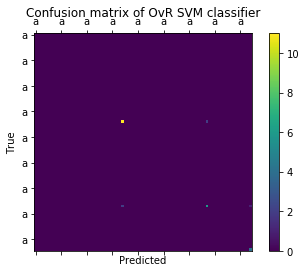

In [18]:
cm = confusion_matrix(y_test, y_pred, label_list) 

print(cm) 

fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 

plt.title('Confusion matrix of OvR SVM classifier')
fig.colorbar(cax) 

ax.set_xticklabels([''] + label_list) 
ax.set_yticklabels([''] + label_list) 

plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

In [19]:
temp = 0 
count = 0
while(temp!=len(y_pred)):
    if (y_pred[temp] == y_test[temp]):
        count+=1
    temp+=1
print(count/len(y_pred)*100)

80.76923076923077
